In [ ]:
### Header: introduce dataset and goals

![Image](./resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Population Coding</h1> 
<h2 align="center"> Day 2, Afternoon Session</h2> 



<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
In the first workshop of today, we examined how sensory variables can be encoded in individual neurons' activity. We now turn our attention to the coordinated activity of groups of neurons: population codes!
    
### How do populations of neurons encode information about sensory stimuli? 
### How are these population codes modulated by context or behavioral state? 
### What other types of thing are encoded in population activity?

In [ ]:
### Replace this section with the standard setup!

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

base_dir = "/Users/gkocker/Documents/projects/swdb_2024_physiology"
data_dir = os.path.join(base_dir, "data")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=Path(data_dir))

# get the metadata tables
units_table = cache.get_unit_table()

channels_table = cache.get_channel_table()

probes_table = cache.get_probe_table()

behavior_sessions_table = cache.get_behavior_session_table()

ecephys_sessions_table = cache.get_ecephys_session_table()

Grab data from a session

In [3]:
session = cache.get_ecephys_session(
           ecephys_session_id=1065437523)

/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


The stimulus presentations table is a record of every stimulus we presented to the mouse over the course of this experiment. The different stimuli are indexed by the 'stimulus_block' column. Let's group this dataframe by stimulus block and see what stimulus was shown for each block.

In [4]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations.groupby('stimulus_block')[['stimulus_block', 
                                                'stimulus_name', 
                                                'active', 
                                                'duration', 
                                                'start_time']].head()

,stimulus_block,stimulus_name,active,duration,start_time
stimulus_presentations_id,,,,,
0,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.131464
1,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.882028
2,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250232,29.632680
3,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250186,30.383329
4,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250229,31.133886
4797,1,spontaneous,False,10.008420,3648.207579
4798,2,gabor_20_deg_250ms,False,0.250208,3658.215999
4799,2,gabor_20_deg_250ms,False,0.250208,3658.466207
4800,2,gabor_20_deg_250ms,False,0.250208,3658.716415


And, let's see the stimuli that were presented:

In [5]:
stimulus_presentations.columns

Index(['stimulus_block', 'image_name', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'flashes_since_change', 'trials_id', 'stimulus_index', 'stimulus_name',
       'position_y', 'active', 'spatial_frequency', 'contrast', 'orientation',
       'is_sham_change', 'rewarded', 'color', 'temporal_frequency',
       'position_x'],
      dtype='object')

In [6]:
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,position_y,active,spatial_frequency,contrast,orientation,is_sham_change,rewarded,color,temporal_frequency,position_x
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,5,im047_r,0.250210,8776.735046,8776.985256,522677,522692,False,False,False,...,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN
13382,5,im047_r,0.250207,8777.485673,8777.735881,522722,522737,False,False,False,...,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN
13383,5,im047_r,0.250208,8778.236296,8778.486503,522767,522782,False,False,False,...,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN


Now let's get unit and channel data, sort the units by depth and filter for "good" units.

In [7]:
### get unit and channel data, sort the units by depth and filter for "good" units
units = session.get_units()
channels = session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

#first let's sort our units by depth and filter
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

In [8]:
good_units.index.values

array([1068232329, 1068230192, 1068232327, ..., 1068230683, 1068232010,
       1068230684])

Which brain structures were recorded from in this session?

In [9]:
unit_channels.value_counts('structure_acronym')

structure_acronym
SGN      260
CA1      228
DG       167
VISpm    165
APN      151
TH       146
VISam    144
VISp     131
VISl     127
VISal    125
MRN      106
VISrl     99
ProS      98
PP        94
PIL       74
PoT       70
CA3       67
SUB       52
LP        24
MGm       21
NOT       18
RN        17
MB        15
POST       2
LT         2
MGv        1
dtype: int64

In [10]:
### Let's look at population activity in an area of interest
area_of_interest = 'VISp'
area_units = good_units[good_units['structure_acronym'] == area_of_interest]

In [11]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_name == 'Natural_Images_Lum_Matched_set_ophys_G_2019']
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,position_y,active,spatial_frequency,contrast,orientation,is_sham_change,rewarded,color,temporal_frequency,position_x
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,5,im047_r,0.250210,8776.735046,8776.985256,522677,522692,False,False,False,...,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN
13382,5,im047_r,0.250207,8777.485673,8777.735881,522722,522737,False,False,False,...,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN
13383,5,im047_r,0.250208,8778.236296,8778.486503,522767,522782,False,False,False,...,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN


In [12]:
### What stimuli are presented in these blocks?
np.sort(stimulus_presentations['image_name'].unique())

array(['im012_r', 'im036_r', 'im044_r', 'im047_r', 'im078_r', 'im083_r',
       'im111_r', 'im115_r', 'omitted'], dtype=object)

Text(0, 0.5, 'Unit')

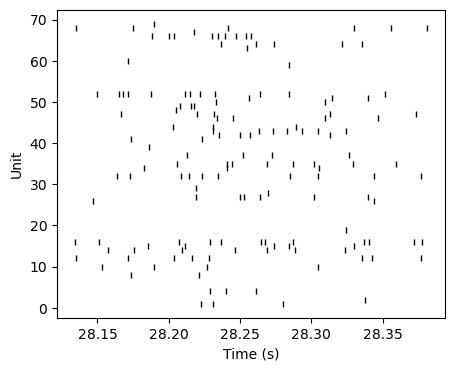

In [13]:
### plot a single-trial raster, population PSTH, and representation matrix
plt.figure(figsize=(5,4))

presentation_idx = 0
start_time = stimulus_presentations['start_time'][presentation_idx]
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    unit_num_spikes = len(unit_spike_times)
    
    plt.plot(unit_spike_times, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

plt.xlabel('Time (s)')
plt.ylabel('Unit')

Text(0, 0.5, 'Unit')

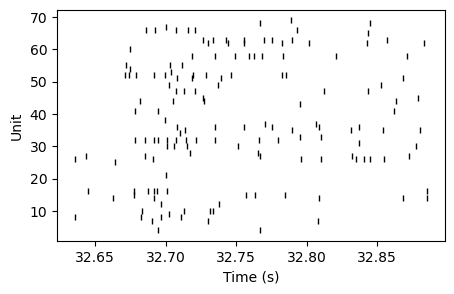

In [14]:

### plot a single-trial raster, population PSTH, and representation matrix
plt.figure(figsize=(5, 3))

change_idx = np.where(stimulus_presentations['is_change'].values)[0]
presentation_idx = change_idx[0]

start_time = stimulus_presentations['start_time'][presentation_idx]
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    unit_num_spikes = len(unit_spike_times)
    
    plt.plot(unit_spike_times, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

plt.xlabel('Time (s)')
plt.ylabel('Unit')

In [15]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

In [16]:
### Plot a set of PSTHs
presentations_sorted = stimulus_presentations.sort_values(by='image_name')
num_units = len(area_units)

stimuli = presentations_sorted['image_name'].unique()
good_stim = [p is not np.nan for p in stimuli]
stimuli = stimuli[good_stim]
num_stim = len(stimuli)

tuning_curves = np.zeros((num_units, num_stim))
unit_num = 0

stimulus = stimuli[0]

psths = []
time_before_im = 1
duration = 2

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    presentations = presentations_sorted[presentations_sorted['image_name'] == stimulus]
    num_presentations = len(presentations)
    
    start_times = presentations['start_time'].values
    
    unit_response, bins = makePSTH(unit_spike_times, 
                                      start_times - time_before_im, 
                                      duration, binSize=0.01)
    
    psths.append(unit_response)

psths = np.array(psths)

Text(0, 0.5, 'Firing rate (Hz)')

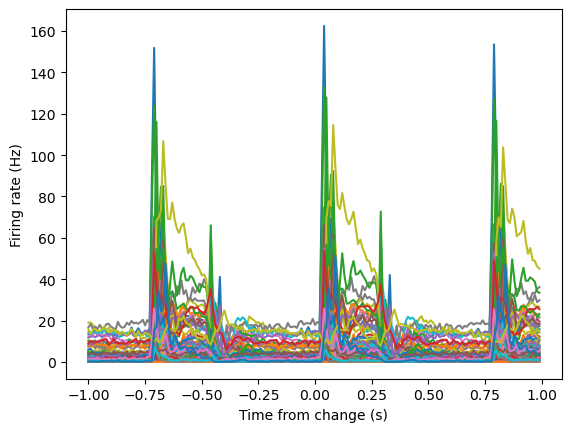

In [17]:
plt.figure()
plt.plot(bins[:-1] - time_before_im, psths.T);
plt.xlabel('Time from change (s)')
plt.ylabel('Firing rate (Hz)')

In [18]:

# for area in areas_of_interest:
#     area_units = all_area_units[all_area_units['structure_acronym'] == area]
    
#     unit_change_responses = []
    
#     for iu, unit in area_units.iterrows():
#         unit_spike_times = spike_times[iu]
#         unit_num_spikes = len(unit_spike_times)
#         plt.plot(unit_spike_times, iu*np.ones(unit_num_spikes,), 'k|')
        
        
# presentations = presentations.sort_values(by='orientation')
# unit_ids = unit_metrics_VISp.sort_values(by=['pref_ori_dg']).index.values
        
# da = session.presentationwise_spike_counts(np.arange(0,1.99,0.01), presentations.index.values, unit_ids)

# plt.figure(figsize=(10,8))

# firing_rates = da.sum('time_relative_to_stimulus_onset').T / 2
# max_rates = firing_rates.max('unit_id')
# norm_firing_rates = firing_rates / np.tile(max_rates, (len(unit_ids),1))

# plt.imshow(norm_firing_rates, cmap='gray_r', aspect='auto', vmax=1)
# plt.xlabel('Presentation index')
# plt.ylabel('Unit index')
# plt.colorbar(label='Firing rate', aspect=20)
# _ = plt.ylim([0, len(unit_ids)])

## Training a classifier on population spiking data

In order to determine how well we can decode the stimulus direction from population activity, we will train a **classifier** on our matrix of firing rates. Whereas regression models try to predict continuous values from the input features, classification models try to predict *labels* (also known as classes) from the input features.

### Support Vector Machines

Let's start with a linear Support Vector Machine (SVM) classifier, which will try to draw linear boundaries between orientation conditions (the labels) in our 94-dimensional firing rate space.

This cartoon shows how we would expect an SVM to behave on a much simpler dataset, which has two dimensions and three conditions:

![SVM illustration](./resources/svm-classifier.png)

SVM computes decision boundaries in feature space that can be used to classify different conditions. If a new data point appears, the SVM classifier will label it based on where it falls with respect to these boundaries.

To train an SVM, we need to import the following methods from `scikit-learn`:

In [70]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

### First, we need to create a response matrix and vector of stimulus labels. (Note: creating this takes a few minutes.)

In [20]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_name == 'Natural_Images_Lum_Matched_set_ophys_G_2019']
stimulus_presentations = stimulus_presentations[stimulus_presentations.active]

num_presentations = len(stimulus_presentations)
stimulus_presentations.head()

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,position_y,active,spatial_frequency,contrast,orientation,is_sham_change,rewarded,color,temporal_frequency,position_x
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,NaN


In [21]:
labels = []
responses = []

presentation_num = 0

for presentation_idx, presentation in stimulus_presentations.iterrows():    
    start_time = stimulus_presentations['start_time'][presentation_idx]
    end_time = stimulus_presentations['end_time'][presentation_idx]
    duration = end_time - start_time
    
    if np.isnan(duration):
        continue
    
    labels.append(presentation.image_name)
    
    unit_num = 0

    presentation_responses = np.zeros((num_units,))
    
    for iu, unit in area_units.iterrows():
        unit_spike_times = spike_times[iu]
        presentation_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
        
        presentation_responses[unit_num] = len(presentation_spike_times) / duration
        
        unit_num += 1

    responses.append(presentation_responses)
    presentation_num += 1
        
responses = np.array(responses)
labels = np.array(labels)

We will first select a random subset of trials for training the classifier:

In [22]:
total_presentations = responses.shape[0]
num_train = int(total_presentations * 0.5) # Use 50% of trials for training
random_trial_order = np.random.permutation(responses.shape[0])
train_indices = random_trial_order[:num_train]

training_data = responses[train_indices]
training_labels = labels[train_indices]

Next, we'll create the model and fit it to our training data:

In [71]:
# clf = svm.SVC(gamma="scale", kernel="linear")
# clf = svm.SVC()
# clf = RandomForestClassifier(min_samples_leaf=20)
clf = LinearDiscriminantAnalysis()
clf.fit(responses[train_indices], labels[train_indices])

LinearDiscriminantAnalysis()

Now that our model has been trained, we can ask it to classify unlabeled data (i.e., the sets of population firing rates that were not included in our original training set):

In [72]:
test_indices = random_trial_order[num_train:]
test_data = responses[test_indices]
predicted_labels = clf.predict(responses[test_indices])

We can compare the predicted labels to the actual labels in order to assess the classifier's performance:

In [73]:
conditions = np.unique(labels)

actual_labels = labels[test_indices]
accuracy = np.mean(actual_labels == predicted_labels)

print('Accurary: {}'.format(accuracy))
print('Chance level: {}'.format(1/len(conditions)))

# accuracy = 1 - (np.count_nonzero(predicted_labels - actual_labels) / predicted_labels.size)

# plt.figure(figsize=(5,5))

# # add a random offset to make sure the points don't overlap
# plt.scatter(actual_labels + np.random.rand(len(test_indices)) * 20, 
#             predicted_labels + np.random.rand(len(test_indices)) * 20, 
#            s=6)
# plt.plot([0,360],[0,360],'--k', alpha=0.1)

# plt.title(f'Classification accuracy: {accuracy}')
# plt.xlabel('Actual direction (degrees)')
# plt.xlabel('Predicted direction (degrees)')

Accurary: 0.9983326385994165
Chance level: 0.1111111111111111


Here, we see that most of the trials are predicted correctly (values on the diagonal line), but it's making some mistakes (off-diagonal points). This indicates that the firing rates of our recorded population do contain information about grating direction, but there are some trials in which the direction is ambiguous, at least to this type of classifier.

We can get a better sense of classification performance by using the `scikit-learn.model_selection.KFold` iterator to automatically split up the data into "train" and "test" sets for 5 iterations. Note that the model is fit independently on each iteration.

In [91]:
accuracies = []
confusions = []

conditions = np.unique(labels)
num_splits = 5

for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
    
#     clf = svm.SVC(gamma="scale", kernel="rbf")
#     clf = RandomForestClassifier(min_samples_leaf=20)
    clf = LinearDiscriminantAnalysis()

    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)    
    print(accuracy)
    
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")

0.996875
0.9979166666666667
0.9979144942648592
0.9989572471324296
0.9979144942648592

mean accuracy: 0.997915580465763
chance: 0.1111111111111111


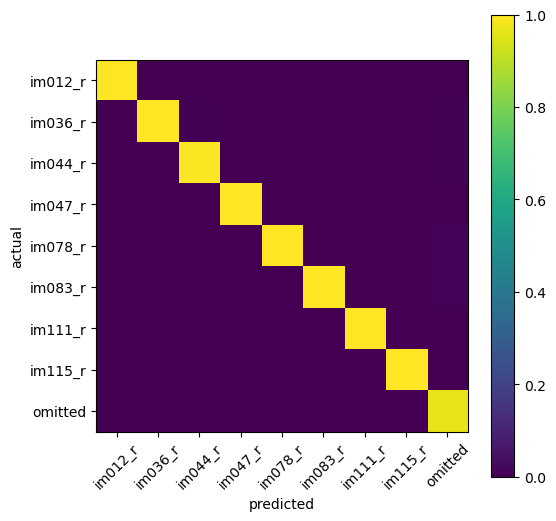

In [92]:
def plot_confusion_matrix(confusions, conditions):
    
    plt.figure(figsize=(6,6))
    
    mean_confusion = np.mean(confusions, axis=0)

    plt.imshow(mean_confusion)
    plt.colorbar()
    
    plt.xticks(range(len(conditions)), conditions, rotation=45)
    plt.yticks(range(len(conditions)), conditions)

    plt.xlabel("predicted")
    plt.ylabel("actual")
    
plot_confusion_matrix(confusions, conditions)

We can see that the stimulus is perfectly decodable! Great success!

On the other hand, this is not very informative. 

### Is the accuracy different for familiar vs novel images?

### Is the accuracy different in active vs passive trials?

### Is the accuracy different in hit vs miss trials?

## Relationship between population size and decoding accuracy

Next we'll examine how the size of the simultaneously recorded population affects decoding accuracy. In any physiology experiment, we only have a very small window into the overall population response. For example, there are about 500,000 neurons in mouse V1, so in this case we are measuring around 0.02% of the firing rates in this region.

As the number of simultaneously recorded neurons increases, we expect that our ability to decode stimulus identity will improve. Let's try to get a sense for how this changes with the number of neurons we use to train the classifier:

In [113]:
pop_sizes = np.arange(1, 50, 5).astype('int')
num_resamples = 50

accuracies = np.zeros((len(pop_sizes), num_resamples, num_splits))

for i, pop_size in enumerate(pop_sizes):
    print('population size: {}'.format(pop_size))
    for j in range(num_resamples):
#         print('sample: {}'.format(j))
        pop_idx = np.random.choice(range(num_units), size=pop_size)
        responses_pop = responses[:, pop_idx]

        k = 0
        for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses_pop):
#             clf = svm.SVC(gamma="scale", kernel="rbf")
            clf = LinearDiscriminantAnalysis()

            clf.fit(responses_pop[train_indices], labels[train_indices])

            test_targets = labels[test_indices]
            test_predictions = clf.predict(responses_pop[test_indices])

            accuracy = np.mean(test_targets == test_predictions)    
#             print(accuracy)

            accuracies[i, j, k] = accuracy
            k += 1

population size: 1
population size: 6
population size: 11
population size: 16
population size: 21
population size: 26
population size: 31
population size: 36
population size: 41
population size: 46


In [117]:
plt.figure()
plt.plot(pop_sizes, accuracies.mean(axis=(1,2))
plt.xlabel('Population size')
plt.ylabel('Accuracy')

SyntaxError: invalid syntax (383967087.py, line 3)

## Exploring correlations between neurons

Based on the plot above, it's clear that neurons are correlated with one another. For example, look at units 35-40 and notice how they tend to have high firing rates or low firing rates on similar trials.

We'll look at this correlation in much more detail below, but we should first note some assumptions. Primarily, we are studying *spike counts*, or rates within time windows defined by the stimulus. This assumes that all spikes within the windows are equivalent, no matter their relative timing. It also assumes a specific set of time windows (set by the stimulus). In some cases, these assumptions may not be desirable (e.g., in studies of time-lagged spike-spike correlation, frequently used in studies of functional connectivity.)

With that tangent aside, let's return to our observation that the neurons' activities (defined here by spike rates) are correlated.

<!-- The activities of correlated neural populations have a *lower dimensionality* than the number of neurons. For example, for two perfectly correlated neurons, a single number suffices to describe both of their firing rates. This same idea applies to larger populations, and to less-than-perfect correlations. -->

<!-- To explore this property, we will apply the most common dimensionality reduction technique in existence to these data: Principal Component Analysis (PCA). This is a linear dimensionality reduction method (more on this later), and it works by considering the space of all possible neuron responses, wherein each axis of the space is a single neuron's firing rate. PCA finds the directions in this space along which the activities are the most spread out (highest variance) or the least spread out. -->

## Computing correlation matrices

So far, we have looked at the covariance between neurons. For the following analysis, we will instead look at Pearson correlations instead of covariance: the Pearson correlation for a pair of neurons is the covariance divided by the product of the neurons' standard deviations. This normalizes the measure so that its maximum is 1 and minimum is -1, which makes it easier to interpret than covariances.

So far, we have not considered how much of the covariance or correlation is stimulus-driven (e.g., reflecting neurons with similar tuning responding to the same stimulus at the same time) vs arising from other sources. 

The correlations due to the stimulus properties are called *signal correlations*, whereas correlations due to other sources (including random variability within the eyes and the brain) are called *noise correlations*. The correlations we considered above encapsulate both of these factors, and are called *total* correlations.

To separate these out, we'll now compute and compare all 3 (Pearson) correlation matrices: the total correlations, signal correlations, and noise correlations.

First, the total correlations (using `np.corrcoef`):

In [31]:
responses.shape

(4797, 71)

Text(0, 0.5, 'Unit #')

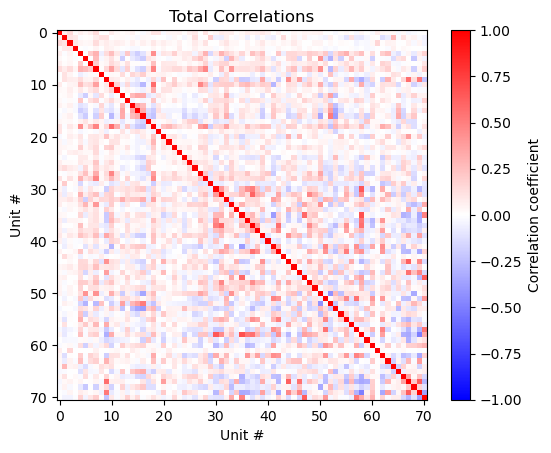

In [32]:
total_correlations = np.corrcoef(responses.T)
plt.imshow(total_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar(label='Correlation coefficient')
plt.title('Total Correlations')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Next, we'll compute the signal correlations. These are the correlations in the neurons' average response to each stimulus (defined by orientation), computed across stimuli. As the name implies, they tell us how much two neurons' mean (trial averaged) activities co-vary as the stimulus changes.

To compute these, we'll first calculate the average activities for each stimulus orientation and neuron, then compute the correlation matrix across stimuli.

Recall that each stimulus was presented 15 times, and we have ordered the stimuli by orientation.

In [33]:
### Compute tuning curves - takes a few minutes

presentations_sorted = stimulus_presentations.sort_values(by='image_name')
num_units = len(area_units)

stimuli = np.sort(presentations_sorted['image_name'].unique())
num_stim = len(stimuli)

tuning_curves = np.zeros((num_units, num_stim))
unit_num = 0

durations = []

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    for j, stim in enumerate(stimuli):
        presentations = presentations_sorted[presentations_sorted['image_name'] == stim]
        num_presentations = len(presentations)
        
        for presentation_idx, presentation in presentations.iterrows():
            start_time = presentations['start_time'][presentation_idx]
            end_time = presentations['end_time'][presentation_idx]
            duration = end_time - start_time
            durations.append(duration)
            
            presentation_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    
            tuning_curves[unit_num, j] += len(presentation_spike_times) / duration / num_presentations
    unit_num += 1

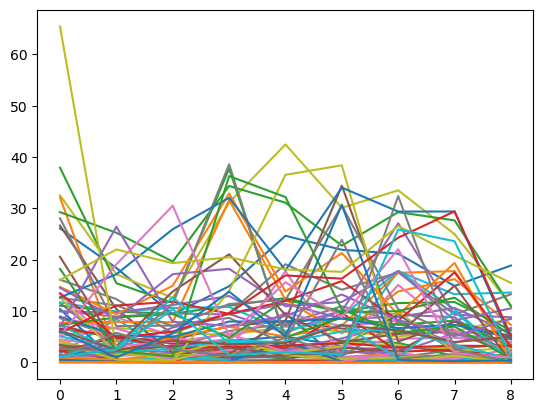

In [34]:
plt.figure()
plt.plot(tuning_curves.T);

Text(0, 0.5, 'Unit #')

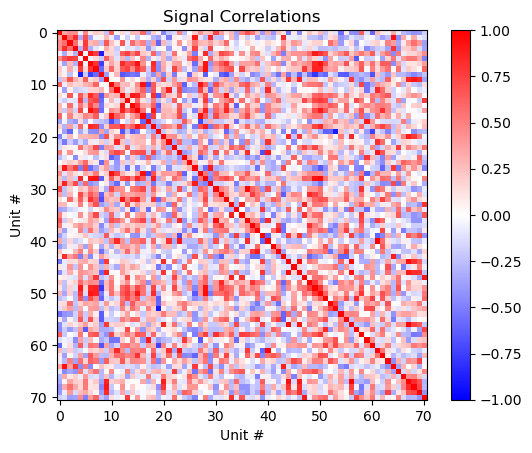

In [35]:
signal_correlations = np.corrcoef(tuning_curves)
plt.imshow(signal_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Signal Correlations')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Finally, let's compute the noise correlations. These are the correlations in the responses to each stimulus, reflecting the (correlated) trial-to-trial variability in the neural population. These correlations can come from synaptic connections (or indirect connections) between the neurons, so that when neuron A fires more on a given trial, neuron B also fires more (excitatory connection), or neuron B fires less (inhibitory connection). The noise correlations can also come from shared input. For example, if neuron C has an excitatory projection to both neurons A and B, then on trials where neuron C has increased firing rate, then both neurons A and B will also show increased firing.

These noise correlations are defined on a per-stimulus basis and can vary somewhat between stimuli. For sake of interest, we'll plot below the correlation matrices for two different stimuli, and we'll later make use of the average correlation matrix (averaged over all 8 orientations).

Since noise correlations are single-trial correlations, if a neuron does not respond to a particular stimulus condition it can generate NaNs. To ignore these, we use numpy's masked array module, numpy.ma.

In [36]:
noise_correlations = np.zeros((len(conditions), num_units, num_units)) # initialize the noise correlation matrix for each stimulus condition

for i, condition in enumerate(conditions):
    condition_idx = np.where(labels == condition)
    responses_condition = responses[condition_idx]
    responses_condition = np.ma.masked_invalid(responses_condition)
    
    noise_correlations[i] = np.ma.corrcoef(responses_condition.T)

Text(0, 0.5, 'Unit #')

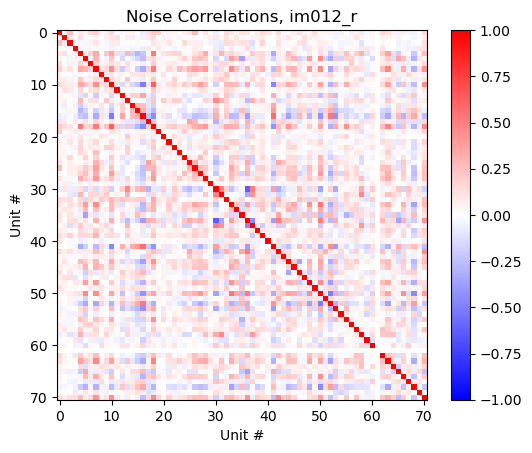

In [37]:
plot_condition_idx = 0

plt.imshow(noise_correlations[plot_condition_idx], cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations, {}'.format(conditions[plot_condition_idx]))
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Note: one neuron doesn't respond to this stimulus! How do you see this in the noise correlation matrix? Which is the unresponsive neuron?

Text(0, 0.5, 'Unit #')

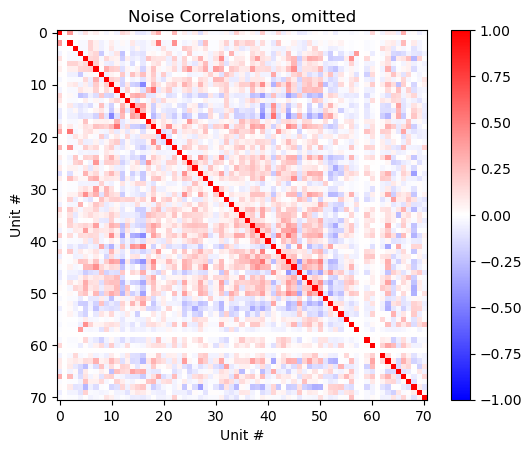

In [38]:
plot_condition_idx = -1

plt.imshow(noise_correlations[plot_condition_idx], cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations, {}'.format(conditions[plot_condition_idx]))
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Note that noise correlations can vary between stimuli! What differences do you see between these two noise correlation matrices?

Text(0, 0.5, 'Unit #')

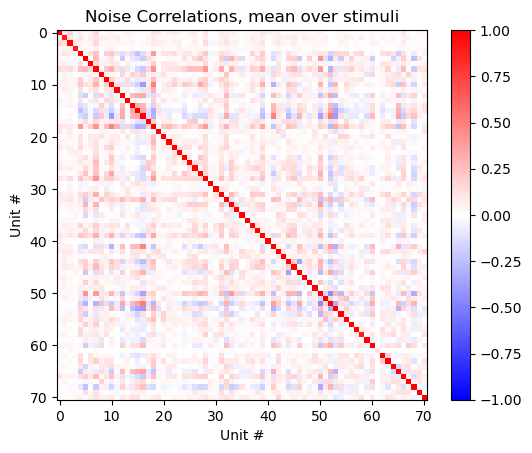

In [39]:
mean_noise_correlations = np.mean(noise_correlations,axis=0)

plt.imshow(mean_noise_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations, mean over stimuli')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Mean Noise Correlation:
0.036775607703499344
Mean Signal Correlation:
0.11182816136061455


Text(0, 0.5, 'Noise Correlation')

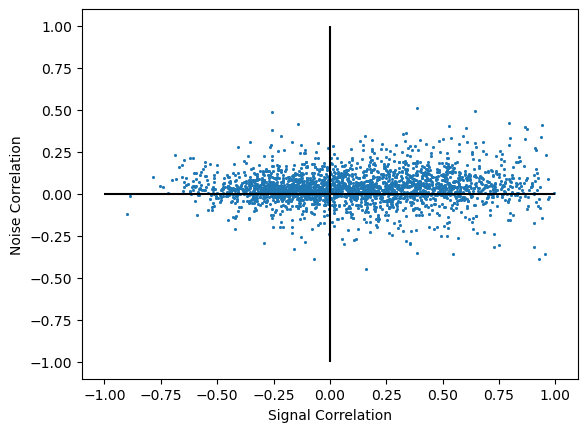

In [40]:
ncorr = np.matrix.flatten(mean_noise_correlations)
diagonal_indices = np.diag_indices(num_units, ndim=2) 
flat_diagonal_indices = np.ravel_multi_index(diagonal_indices, dims=(num_units, num_units))
ncorr = np.delete(ncorr, flat_diagonal_indices)

print('Mean Noise Correlation:')
print(np.mean(ncorr))

scorr = np.matrix.flatten(signal_correlations)
scorr = np.delete(scorr,flat_diagonal_indices)

print('Mean Signal Correlation:')
print(np.mean(scorr))

plt.scatter(scorr,ncorr,s=1)
plt.hlines(0,-1,1,colors='black')
plt.vlines(0,-1,1,colors='black')
plt.xlabel('Signal Correlation')
plt.ylabel('Noise Correlation')

At first these look ~unrelated to each other! If we look closer, we'll note that there is a small (but statistically quite significant) trend for neuron pairs with higher signal correlation to have higher noise correlation, and vice versa.

For this, we'll use the scipy pearsonr function instead of numpy corrcoef, because it returns a p-value from the hypothesis test where the null hypothesis is zero correlation.

In [41]:
from scipy.stats import pearsonr
pearsonr(ncorr,scorr)

PearsonRResult(statistic=0.06204343366748627, pvalue=1.2028594866746549e-05)

While the relation is fairly weak, it is quite robust, and the existence of this positive relationship between signal and noise correlations rules out lots of computational models that made the opposite prediction. See, E.g., the local competition algorithm for implementing sparse coding, which was once a leading theory of V1 computation.

## Population decoding with and without noise correlations

While the noise correlations are fairly weak (averaging ~0.06), it is worth asking whether or not -- from an information processing standpoint -- we can treat each neuron as independent. In other words, are the noise correlations weak enough that they can be ignored?

To test this, we'll return to the decoding analysis from Tutorial 1, and we will try decoding the stimulus in two ways. First, we will decode from the true neural data, which contains the (weak) noise correlations. This is the same as we did in Tutorial 1, so feel free to jump ahead.

Next, for comparison, we will try decoding from synthetic data in which we artificially remove the noise correlations. We do this by trial-shuffling the neural data. This creates a fake dataset in which non-simultaneously-recorded neural activities are assembled to make the population response vectors, and it removes the noise correlations.

To do this, we go through the data, and for each stimulus, and for each neuron, we randomly (and independently) re-order the trials.

In [96]:
shuffled_responses = responses.copy()

for i, condition in enumerate(conditions):
    condition_idx = np.where(labels == condition)

    for j in range(num_units):
        responses_unit_condition = responses[condition_idx, j].reshape(-1)
        np.random.shuffle(responses_unit_condition)
        shuffled_responses[condition_idx, j] = responses_unit_condition

In [97]:
# Double check that our shuffling worked.

shuffled_noise_correlations = np.zeros((len(conditions), num_units, num_units)) # initialize the noise correlation matrix for each stimulus condition

for i, condition in enumerate(conditions):
    condition_idx = np.where(labels == condition)
    responses_condition = shuffled_responses[condition_idx]
#     responses_condition = np.ma.masked_invalid(responses_condition)
    
    shuffled_noise_correlations[i] = np.ma.corrcoef(responses_condition.T)

Text(0, 0.5, 'Unit #')

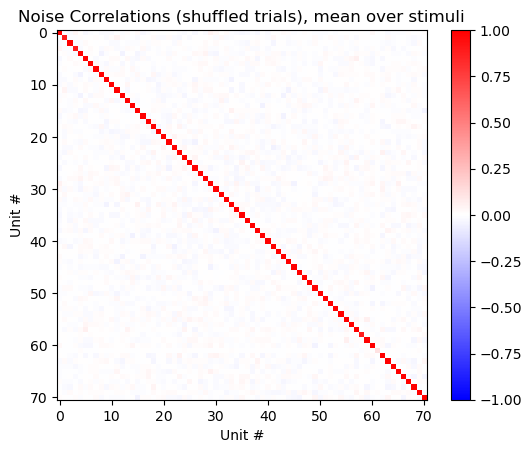

In [98]:
mean_shuffled_noise_correlations = np.mean(shuffled_noise_correlations,axis=0)

plt.imshow(mean_shuffled_noise_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations (shuffled trials), mean over stimuli')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Now let's try decoding from the shuffled data!

In [115]:
accuracies_shuffled_corrs = np.zeros((len(pop_sizes), num_resamples, num_splits))

for i, pop_size in enumerate(pop_sizes):
    print('population size: {}'.format(pop_size))
    for j in range(num_resamples):
#         print('sample: {}'.format(j))
        pop_idx = np.random.choice(range(num_units), size=pop_size)
        responses_pop = shuffled_responses[:, pop_idx]

        k = 0
        for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses_pop):
#             clf = svm.SVC(gamma="scale", kernel="rbf")
#             clf = RandomForestClassifier(min_samples_leaf=20)
            clf = LinearDiscriminantAnalysis()
            clf.fit(responses_pop[train_indices], labels[train_indices])

            test_targets = labels[test_indices]
            test_predictions = clf.predict(responses_pop[test_indices])

            accuracy = np.mean(test_targets == test_predictions)    
#             print(accuracy)

            accuracies_shuffled_corrs[i, j, k] = accuracy
            k += 1

population size: 1
population size: 6
population size: 11
population size: 16
population size: 21
population size: 26
population size: 31
population size: 36
population size: 41
population size: 46


Text(0, 0.5, 'Accuracy')

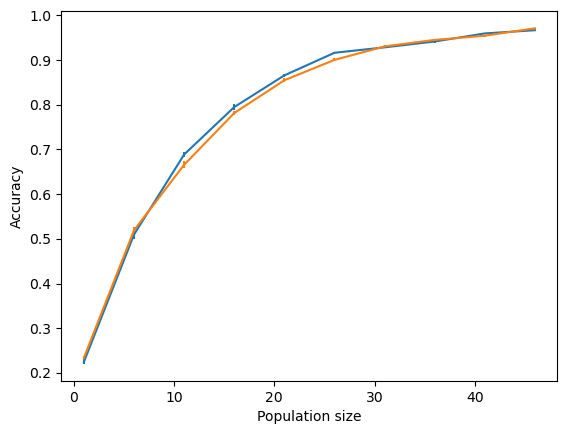

In [116]:
plt.figure()
plt.errorbar(x=pop_sizes, y=accuracies.mean(axis=(1,2)), yerr=accuracies.std(axis=(1,2)) / np.sqrt(num_resamples*num_splits), fmt='-')
plt.errorbar(pop_sizes, y=accuracies_shuffled_corrs.mean(axis=(1,2)), yerr=accuracies_shuffled_corrs.std(axis=(1,2))/ np.sqrt(num_resamples*num_splits), fmt='-')

plt.xlabel('Population size')
plt.ylabel('Accuracy')

# With these analyses in hand, we leave you with some questions:

### How does the decoding accuracy depend on the time since the image presentation? 
### How quickly can you decode the stimulus identity with 90% accuracy from the population activity? 
### Do noise correlations impact the populations' image information differently on different timescales?

### Is the accuracy different for familiar vs novel images?


### Is the structure of the population code for image identity different in active vs passive blocks?

### Is the structure of the population code different on hit vs miss trials?

### Are other variables, including behavioral variables, also encoded in the population activity? Can you decode the running speed, pupil diameter, or licking behavior?

### What about in a different brain area? For example, is the image encoded in CA1 activity? What about in the joint activity across brain areas?